In [ ]:
from transformers import pipeline
import  argparse
import pandas as pd
import json
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


##Test the human abstract and chatgpt abstract using roberta-academic-detector


In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pipe = pipeline("text-classification", model="andreas122001/roberta-academic-detector", device=device)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/885 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

In [ ]:
import pandas as pd

df = pd.read_json('/content/drive/MyDrive/Marcus_Project/Original/arxiv_chatGPT.jsonl', lines=True)

prediction_all = []
actual_all = ['Fake' for _ in range(3000)]
actual_all.extend(['Real' for _ in range(3000)])
prediction_all_human = []

max_seq_length = 512
count = 0
for df in df.itertuples():
  #print(df.machine_abstract)
  count += 1
  print(count, end=", ")
  prediction = json.loads(json.dumps(pipe(df.machine_text[:max_seq_length])[0]['label'].capitalize()))
  prediction_all.append(prediction)
  #print(prediction_all)
  prediction = json.loads(json.dumps(pipe(df.human_text[:max_seq_length])[0]['label'].capitalize()))
  prediction_all_human.append(prediction)
  #print(prediction_all)


prediction_all.extend(prediction_all_human)


1, 2, 3, 4, 5, 6, 7, 8, 

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 22

['Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Machine-generated', 'Machine-generated', 'Human-produced', 'Human-produced', 'Human-produced', 'Machine-generated', 'Human-produced', 'Human-produced', 'Machine-generated', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Machine-generated', 'Human-produced', 'Machine-generated', 'Human-produced', 'Human-produced', 'Human-produced', 'Machine-generated', 'Human-produced', 'Machine-generated', 'Machine-generated', 'Machine-generated', 'Machine-generated', 'Machine-generated', 'Human-produced', 'Machine-generated', 'Human-produced', 'Human-produced', 'Machine-generated', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Machine-generated', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Machine-generated', 'Machine-generated', 'Human-produced', 'Human-produced', 'Machine-generated', 'Human-produced', 'Machine-generated', 'Machi

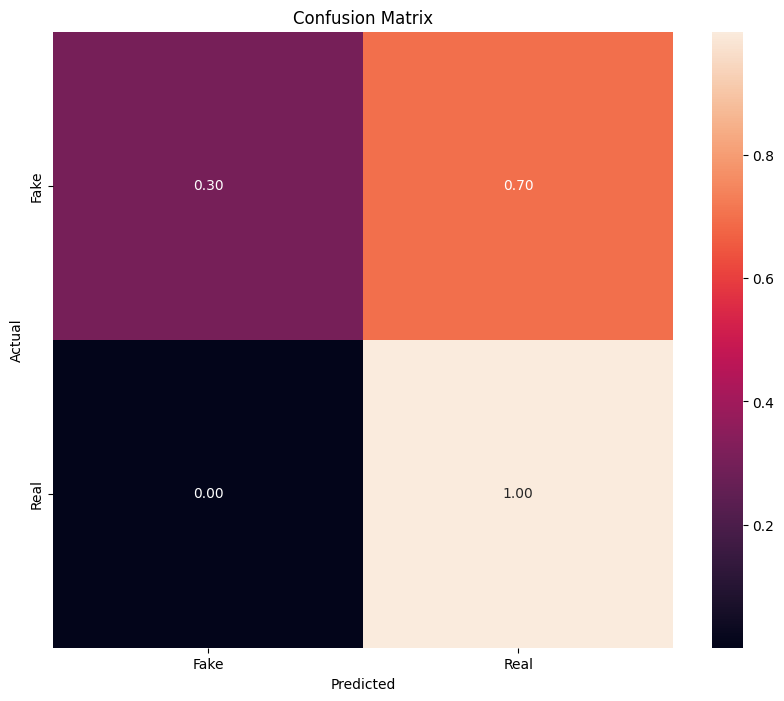

The accuracy is 0.6505
The precision is 0.5886510897310033
The recall is 0.9993333333333333


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

print(prediction_all)
print(actual_all)
prediction_all = ['Real' if x == 'Human-produced' else x for x in prediction_all]
prediction_all = ['Fake' if x == 'Machine-generated' else x for x in prediction_all]
conf_matrix = confusion_matrix(actual_all, prediction_all)
cm = conf_matrix
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=["Fake","Real"], yticklabels=["Fake","Real"])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

# Compute accuracy
accuracy = accuracy_score(actual_all, prediction_all)
print('The accuracy is', accuracy)

# Compute precision
precision = precision_score(actual_all, prediction_all, pos_label='Real')
print('The precision is', precision)

# Compute recall
recall = recall_score(actual_all, prediction_all, pos_label='Real')
print('The recall is', recall)



Test on Coher dataset

In [ ]:
# Path to the JSONL file
jsonl_path = "/content/drive/MyDrive/Marcus_Project/Original/train_test_val/arxiv_cohere_test.jsonl"

# Function to truncate text to fit within max_length
def truncate_text(text, max_length=512):
    if len(text) <= max_length:
        return text
    else:
        # Truncate the text to max_length
        return text[:max_length-5]  # Subtracting 5 to account for [CLS] and [SEP] tokens

# Function to read JSONL file and classify texts
def classify_texts(jsonl_path):
    predictions = []
    count = 0
    with open(jsonl_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            machine_text = truncate_text(data['machine_text'])
            human_text = truncate_text(data['human_text'])

            # Classify machine_text and human_text
            machine_result = pipe(machine_text)[0]
            human_result = pipe(human_text)[0]

            # Append the most confident prediction for both machine_text and human_text
            predictions.append(machine_result['label'])
            predictions.append(human_result['label'])

            print(count)
            count += 1

    return predictions

# Get predictions for the entries in the JSONL file
results = classify_texts(jsonl_path)
print(results)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

The accuracy is 0.5141666666666667
The precision is 0.753592561284869
The recall is 0.5141666666666667


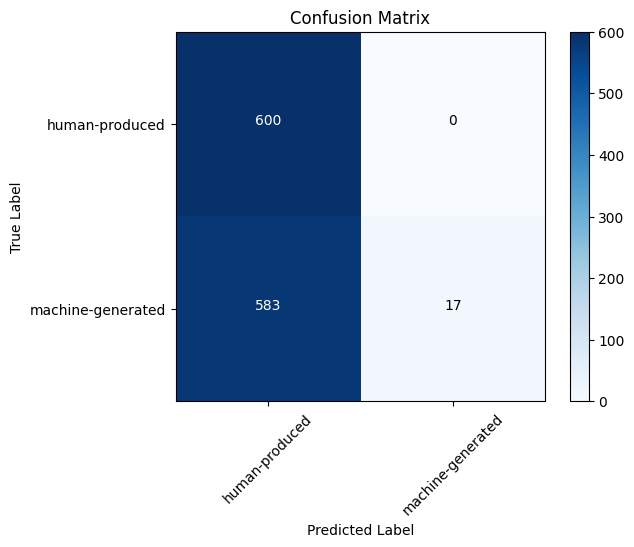

In [ ]:
true_labels = []
for i in range(0, 600):
    true_labels.append('machine-generated')
    true_labels.append('human-produced')


# Count occurrences of each label
human_count = results.count('human-produced')
machine_count = results.count('machine-generated')

# Calculate total number of predictions
total_predictions = len(results)


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Encode labels
encoder = LabelEncoder()
# Fit encoder with all possible labels
all_labels = ['human-produced', 'machine-generated']
encoder.fit(all_labels)
true_labels_encoded = encoder.fit_transform(true_labels)
predictions_encoded = encoder.transform(results)


# Compute confusion matrix
cm = confusion_matrix(true_labels_encoded, predictions_encoded)

# Compute accuracy
accuracy = accuracy_score(true_labels_encoded, predictions_encoded)
print('The accuracy is', accuracy)
# Compute precision
precision = precision_score(true_labels_encoded, predictions_encoded, average='macro')
print('The precision is', precision)
# Compute recall
recall = recall_score(true_labels_encoded, predictions_encoded, average='macro')
print('The recall is', recall)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = encoder.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.show()



Testing on Davinci

In [ ]:
# Path to the JSONL file
jsonl_path = "/content/drive/MyDrive/Marcus_Project/Original/train_test_val/arxiv_davinci_test.jsonl"

# Function to truncate text to fit within max_length
def truncate_text(text, max_length=512):
    if len(text) <= max_length:
        return text
    else:
        # Truncate the text to max_length
        return text[:max_length-5]  # Subtracting 5 to account for [CLS] and [SEP] tokens

# Function to read JSONL file and classify texts
def classify_texts(jsonl_path):
    predictions = []
    count = 0
    with open(jsonl_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            machine_text = truncate_text(data['machine_text'])
            human_text = truncate_text(data['human_text'])

            # Classify machine_text and human_text
            machine_result = pipe(machine_text)[0]
            human_result = pipe(human_text)[0]

            # Append the most confident prediction for both machine_text and human_text
            predictions.append(machine_result['label'])
            predictions.append(human_result['label'])

            print(count)
            count += 1

    return predictions

# Get predictions for the entries in the JSONL file
results = classify_texts(jsonl_path)
print(results)


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

The accuracy is 0.5283333333333333
The precision is 0.7572898799313894
The recall is 0.5283333333333333


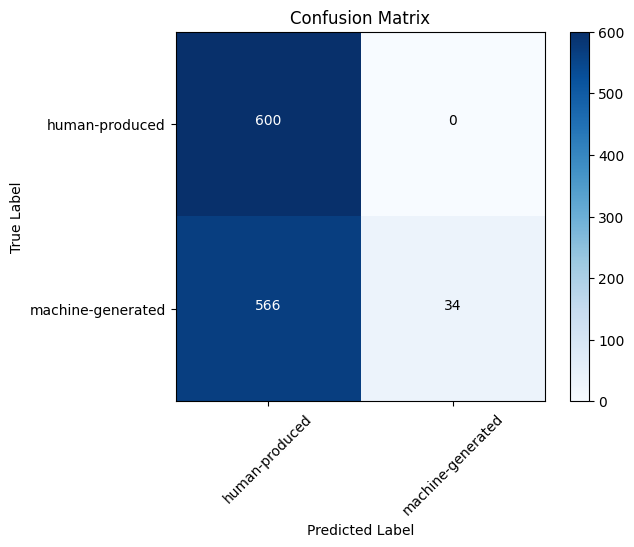

In [ ]:
true_labels = []
for i in range(0, 600):
    true_labels.append('machine-generated')
    true_labels.append('human-produced')


# Count occurrences of each label
human_count = results.count('human-produced')
machine_count = results.count('machine-generated')

# Calculate total number of predictions
total_predictions = len(results)


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Encode labels
encoder = LabelEncoder()
# Fit encoder with all possible labels
all_labels = ['human-produced', 'machine-generated']
encoder.fit(all_labels)
true_labels_encoded = encoder.fit_transform(true_labels)
predictions_encoded = encoder.transform(results)


# Compute confusion matrix
cm = confusion_matrix(true_labels_encoded, predictions_encoded)

# Compute accuracy
accuracy = accuracy_score(true_labels_encoded, predictions_encoded)
print('The accuracy is', accuracy)
# Compute precision
precision = precision_score(true_labels_encoded, predictions_encoded, average='macro')
print('The precision is', precision)
# Compute recall
recall = recall_score(true_labels_encoded, predictions_encoded, average='macro')
print('The recall is', recall)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = encoder.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.show()



Test on Flant5

In [ ]:
# Path to the JSONL file
jsonl_path = "/content/drive/MyDrive/Marcus_Project/Original/train_test_val/arxiv_flant5_test.jsonl"

# Function to truncate text to fit within max_length
def truncate_text(text, max_length=512):
    if len(text) <= max_length:
        return text
    else:
        # Truncate the text to max_length
        return text[:max_length-5]  # Subtracting 5 to account for [CLS] and [SEP] tokens

# Function to read JSONL file and classify texts
def classify_texts(jsonl_path):
    predictions = []
    count = 0
    with open(jsonl_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            machine_text = truncate_text(data['machine_text'])
            human_text = truncate_text(data['human_text'])

            # Classify machine_text and human_text
            machine_result = pipe(machine_text)[0]
            human_result = pipe(human_text)[0]

            # Append the most confident prediction for both machine_text and human_text
            predictions.append(machine_result['label'])
            predictions.append(human_result['label'])

            print(count)
            count += 1

    return predictions

# Get predictions for the entries in the JSONL file
results = classify_texts(jsonl_path)
print(results)


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

The accuracy is 0.7891666666666667
The precision is 0.8516998827667057
The recall is 0.7891666666666667


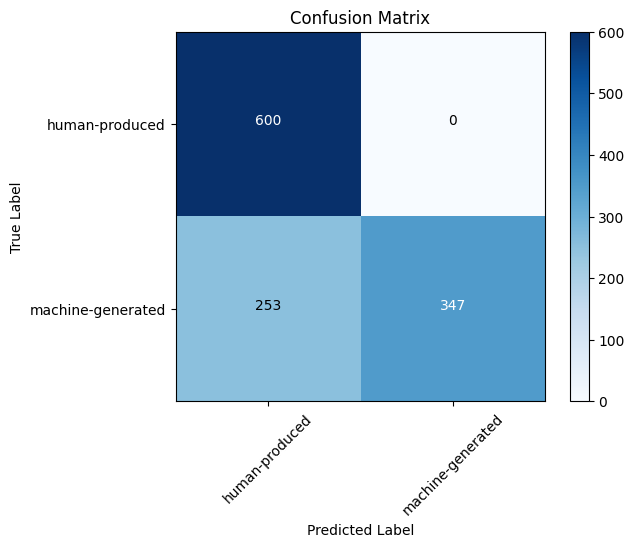

In [ ]:
true_labels = []
for i in range(0, 600):
    true_labels.append('machine-generated')
    true_labels.append('human-produced')


# Count occurrences of each label
human_count = results.count('human-produced')
machine_count = results.count('machine-generated')

# Calculate total number of predictions
total_predictions = len(results)


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Encode labels
encoder = LabelEncoder()
# Fit encoder with all possible labels
all_labels = ['human-produced', 'machine-generated']
encoder.fit(all_labels)
true_labels_encoded = encoder.fit_transform(true_labels)
predictions_encoded = encoder.transform(results)


# Compute confusion matrix
cm = confusion_matrix(true_labels_encoded, predictions_encoded)

# Compute accuracy
accuracy = accuracy_score(true_labels_encoded, predictions_encoded)
print('The accuracy is', accuracy)
# Compute precision
precision = precision_score(true_labels_encoded, predictions_encoded, average='macro')
print('The precision is', precision)
# Compute recall
recall = recall_score(true_labels_encoded, predictions_encoded, average='macro')
print('The recall is', recall)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = encoder.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.show()



Test on Bloomz

In [ ]:
# Path to the JSONL file
jsonl_path = "/content/drive/MyDrive/Marcus_Project/Original/train_test_val/arxiv_bloomz_test.jsonl"

# Function to truncate text to fit within max_length
def truncate_text(text, max_length=512):
    if len(text) <= max_length:
        return text
    else:
        # Truncate the text to max_length
        return text[:max_length-5]  # Subtracting 5 to account for [CLS] and [SEP] tokens

# Function to read JSONL file and classify texts
def classify_texts(jsonl_path):
    predictions = []
    count = 0
    with open(jsonl_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            machine_text = truncate_text(data['machine_abstract'])
            human_text = truncate_text(data['abstract'])

            # Classify machine_text and human_text
            machine_result = pipe(machine_text)[0]
            human_result = pipe(human_text)[0]

            # Append the most confident prediction for both machine_text and human_text
            predictions.append(machine_result['label'])
            predictions.append(human_result['label'])

            print(count)
            count += 1

    return predictions

# Get predictions for the entries in the JSONL file
results = classify_texts(jsonl_path)
print(results)


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

The accuracy is 0.5133333333333333
The precision is 0.7533783783783784
The recall is 0.5133333333333333


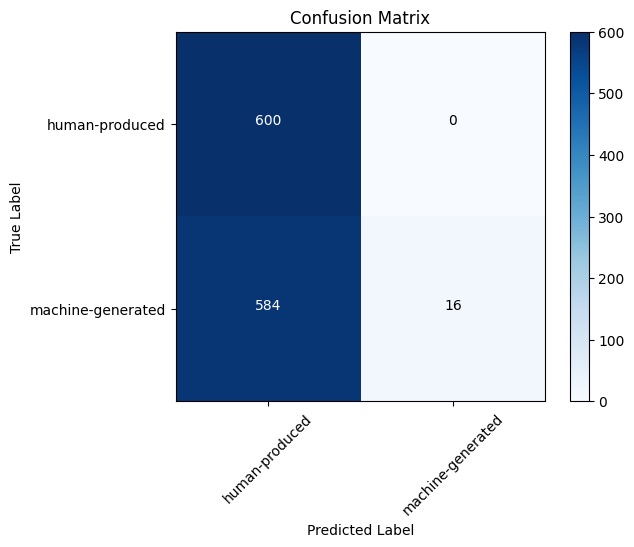

In [ ]:
true_labels = []
for i in range(0, 600):
    true_labels.append('machine-generated')
    true_labels.append('human-produced')


# Count occurrences of each label
human_count = results.count('human-produced')
machine_count = results.count('machine-generated')

# Calculate total number of predictions
total_predictions = len(results)


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Encode labels
encoder = LabelEncoder()
# Fit encoder with all possible labels
all_labels = ['human-produced', 'machine-generated']
encoder.fit(all_labels)
true_labels_encoded = encoder.fit_transform(true_labels)
predictions_encoded = encoder.transform(results)


# Compute confusion matrix
cm = confusion_matrix(true_labels_encoded, predictions_encoded)

# Compute accuracy
accuracy = accuracy_score(true_labels_encoded, predictions_encoded)
print('The accuracy is', accuracy)
# Compute precision
precision = precision_score(true_labels_encoded, predictions_encoded, average='macro')
print('The precision is', precision)
# Compute recall
recall = recall_score(true_labels_encoded, predictions_encoded, average='macro')
print('The recall is', recall)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = encoder.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.show()



Test on paraphrased chatgpt

In [ ]:
# Path to the JSONL file
jsonl_path = "/content/drive/MyDrive/Marcus_Project/Original/train_test_val/arxiv_chatGPT_paraphrased_mt_full.jsonl"

# Function to truncate text to fit within max_length
def truncate_text(text, max_length=512):
    if len(text) <= max_length:
        return text
    else:
        # Truncate the text to max_length
        return text[:max_length-5]  # Subtracting 5 to account for [CLS] and [SEP] tokens

# Function to read JSONL file and classify texts
def classify_texts(jsonl_path):
    predictions = []
    count = 0
    with open(jsonl_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            machine_text = truncate_text(data['machine_text'])
            human_text = truncate_text(data['human_text'])

            # Classify machine_text and human_text
            machine_result = pipe(machine_text)[0]
            human_result = pipe(human_text)[0]

            # Append the most confident prediction for both machine_text and human_text
            predictions.append(machine_result['label'])
            predictions.append(human_result['label'])

            print(count)
            count += 1

    return predictions

# Get predictions for the entries in the JSONL file
results = classify_texts(jsonl_path)
print(results)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

The accuracy is 0.6461666666666667
The precision is 0.7927971891469843
The recall is 0.6461666666666667


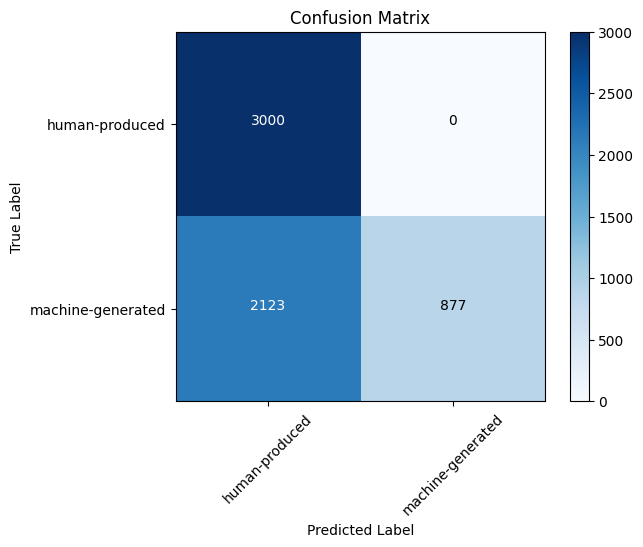

In [ ]:
true_labels = []
for i in range(0, 3000):
    true_labels.append('machine-generated')
    true_labels.append('human-produced')


# Count occurrences of each label
human_count = results.count('human-produced')
machine_count = results.count('machine-generated')

# Calculate total number of predictions
total_predictions = len(results)


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Encode labels
encoder = LabelEncoder()
# Fit encoder with all possible labels
all_labels = ['human-produced', 'machine-generated']
encoder.fit(all_labels)
true_labels_encoded = encoder.fit_transform(true_labels)
predictions_encoded = encoder.transform(results)


# Compute confusion matrix
cm = confusion_matrix(true_labels_encoded, predictions_encoded)

# Compute accuracy
accuracy = accuracy_score(true_labels_encoded, predictions_encoded)
print('The accuracy is', accuracy)
# Compute precision
precision = precision_score(true_labels_encoded, predictions_encoded, average='macro')
print('The precision is', precision)
# Compute recall
recall = recall_score(true_labels_encoded, predictions_encoded, average='macro')
print('The recall is', recall)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = encoder.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.show()

